In [2]:
print("Tanvir")

Tanvir


In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('customer_churn_data.csv')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [5]:
df.shape

(1000, 10)

In [6]:
from sklearn.model_selection import train_test_split 
train_data,test_data = train_test_split(df,test_size=0.2,random_state=42)

In [7]:
from evidently import Report 
from evidently.presets import DataDriftPreset

In [8]:
drift_report = Report([DataDriftPreset()],include_tests=True)
report=drift_report.run(train_data,test_data)

In [9]:
# report
# report.save_html('data_drift_detect.html') 


In [10]:
import json
report_json = report.json()
report_dict = json.loads(report_json)

In [11]:
report_json

'{"metrics": [{"id": "15e89f895b482f9b84ba7274ed18a106", "metric_id": "DriftedColumnsCount(drift_share=0.5)", "value": {"count": 0.0, "share": 0.0}}, {"id": "ab0039ad31d7279315fcf12c01669928", "metric_id": "ValueDrift(column=CustomerID)", "value": 0.7322993405433824}, {"id": "8f5d1c60a32d6fc1bd54bc53af61d8e8", "metric_id": "ValueDrift(column=Age)", "value": 0.9948326360151586}, {"id": "44af7ff50b9319ad30493a39cabd4056", "metric_id": "ValueDrift(column=Tenure)", "value": 0.8076312171824562}, {"id": "0bf1387085a2a91b2769952acb655d9c", "metric_id": "ValueDrift(column=MonthlyCharges)", "value": 0.5733039905352176}, {"id": "5491f22108fcd1760c261f143872c90f", "metric_id": "ValueDrift(column=TotalCharges)", "value": 0.9117201049285875}, {"id": "36230dcfc62097d9b2725a795000a999", "metric_id": "ValueDrift(column=Gender)", "value": 0.48535293358587106}, {"id": "8b64f9c27da5d7fbb5316d3a271b6906", "metric_id": "ValueDrift(column=ContractType)", "value": 0.9032997304157427}, {"id": "322b06baa2c2dc7

In [12]:
n_features = sum(1 for m in report_dict["metrics"] if "ValueDrift" in m["metric_id"])
drift_metric = next(m for m in report_dict["metrics"] if "DriftedColumnsCount" in m["metric_id"])
n_drifted_features = drift_metric["value"]["count"]
# Dataset drift status
drift_status = n_drifted_features > 0

In [13]:
drift_status

False

In [14]:
print(f"{n_drifted_features/n_features} are drift")

0.0 are drift


In [15]:
df.columns.to_list()

['CustomerID',
 'Age',
 'Gender',
 'Tenure',
 'MonthlyCharges',
 'ContractType',
 'InternetService',
 'TotalCharges',
 'TechSupport',
 'Churn']

In [16]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [17]:
df.InternetService.value_counts()

InternetService
Fiber Optic    395
DSL            308
Name: count, dtype: int64

In [18]:
df.ContractType.value_counts()

ContractType
Month-to-Month    511
One-Year          289
Two-Year          200
Name: count, dtype: int64

In [19]:
df.groupby('ContractType')['InternetService'].value_counts()

ContractType    InternetService
Month-to-Month  Fiber Optic        199
                DSL                154
One-Year        Fiber Optic        117
                DSL                 82
Two-Year        Fiber Optic         79
                DSL                 72
Name: count, dtype: int64

In [20]:
df['InternetService'] = np.where(
    df['InternetService'].isnull() & (df['ContractType']=='Month-to-Month'),
    'Fiber Optic',
    np.where(
        df['InternetService'].isnull() & (df['ContractType']=='One-Year'),
        'DSL',
        np.where(
            df['InternetService'].isnull() & (df['ContractType']=='Two-Year'),
            'DSL',
            df['InternetService']  
        )
    )
)


# df['InternetService01'] = df.groupby('ContractType')['InternetService'].transform(
#     lambda x: x.fillna(x.mode()[0])
# )

# df['InternetService01'] = df.groupby('ContractType')['InternetService'].apply(
#     lambda x: x.fillna(x.mode()[0])
# ).reset_index(level=0, drop=True)



In [21]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [22]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    553
DSL            447
Name: count, dtype: int64

In [23]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes


In [24]:
df.groupby('ContractType')['InternetService'].value_counts()


ContractType    InternetService
Month-to-Month  Fiber Optic        357
                DSL                154
One-Year        DSL                172
                Fiber Optic        117
Two-Year        DSL                121
                Fiber Optic         79
Name: count, dtype: int64

In [25]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [27]:
df.Gender.value_counts()

Gender
Female    538
Male      462
Name: count, dtype: int64

In [37]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts(dropna=False))



Value counts for column: Gender
Gender
Female    538
Male      462
Name: count, dtype: int64

Value counts for column: ContractType
ContractType
Month-to-Month    511
One-Year          289
Two-Year          200
Name: count, dtype: int64

Value counts for column: InternetService
InternetService
Fiber Optic    553
DSL            447
Name: count, dtype: int64

Value counts for column: TechSupport
TechSupport
Yes    506
No     494
Name: count, dtype: int64

Value counts for column: Churn
Churn
Yes    883
No     117
Name: count, dtype: int64


In [38]:
# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score


# LabelEncodeing

In [44]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str)) 

df.drop('CustomerID',axis=1,inplace=True)

In [45]:
df.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,1,4,88.35,0,1,353.40,1,1
1,43,1,0,36.67,0,1,0.00,1,1
2,51,0,2,63.79,0,1,127.58,0,1
3,60,0,8,102.34,1,0,818.72,1,1
4,42,1,32,69.01,0,1,2208.32,0,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1000 non-null   int64  
 1   Gender           1000 non-null   int64  
 2   Tenure           1000 non-null   int64  
 3   MonthlyCharges   1000 non-null   float64
 4   ContractType     1000 non-null   int64  
 5   InternetService  1000 non-null   int64  
 6   TotalCharges     1000 non-null   float64
 7   TechSupport      1000 non-null   int64  
 8   Churn            1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


# preprocessing

# model_train

In [47]:
# Example for classification
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [48]:
# Dictionary of classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    
}

# Loop through classifiers
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



LogisticRegression Results:
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.94      0.98      0.96       177

    accuracy                           0.92       200
   macro avg       0.83      0.73      0.77       200
weighted avg       0.91      0.92      0.91       200


DecisionTree Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200




RandomForest Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


GradientBoosting Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


AdaBoost Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg     

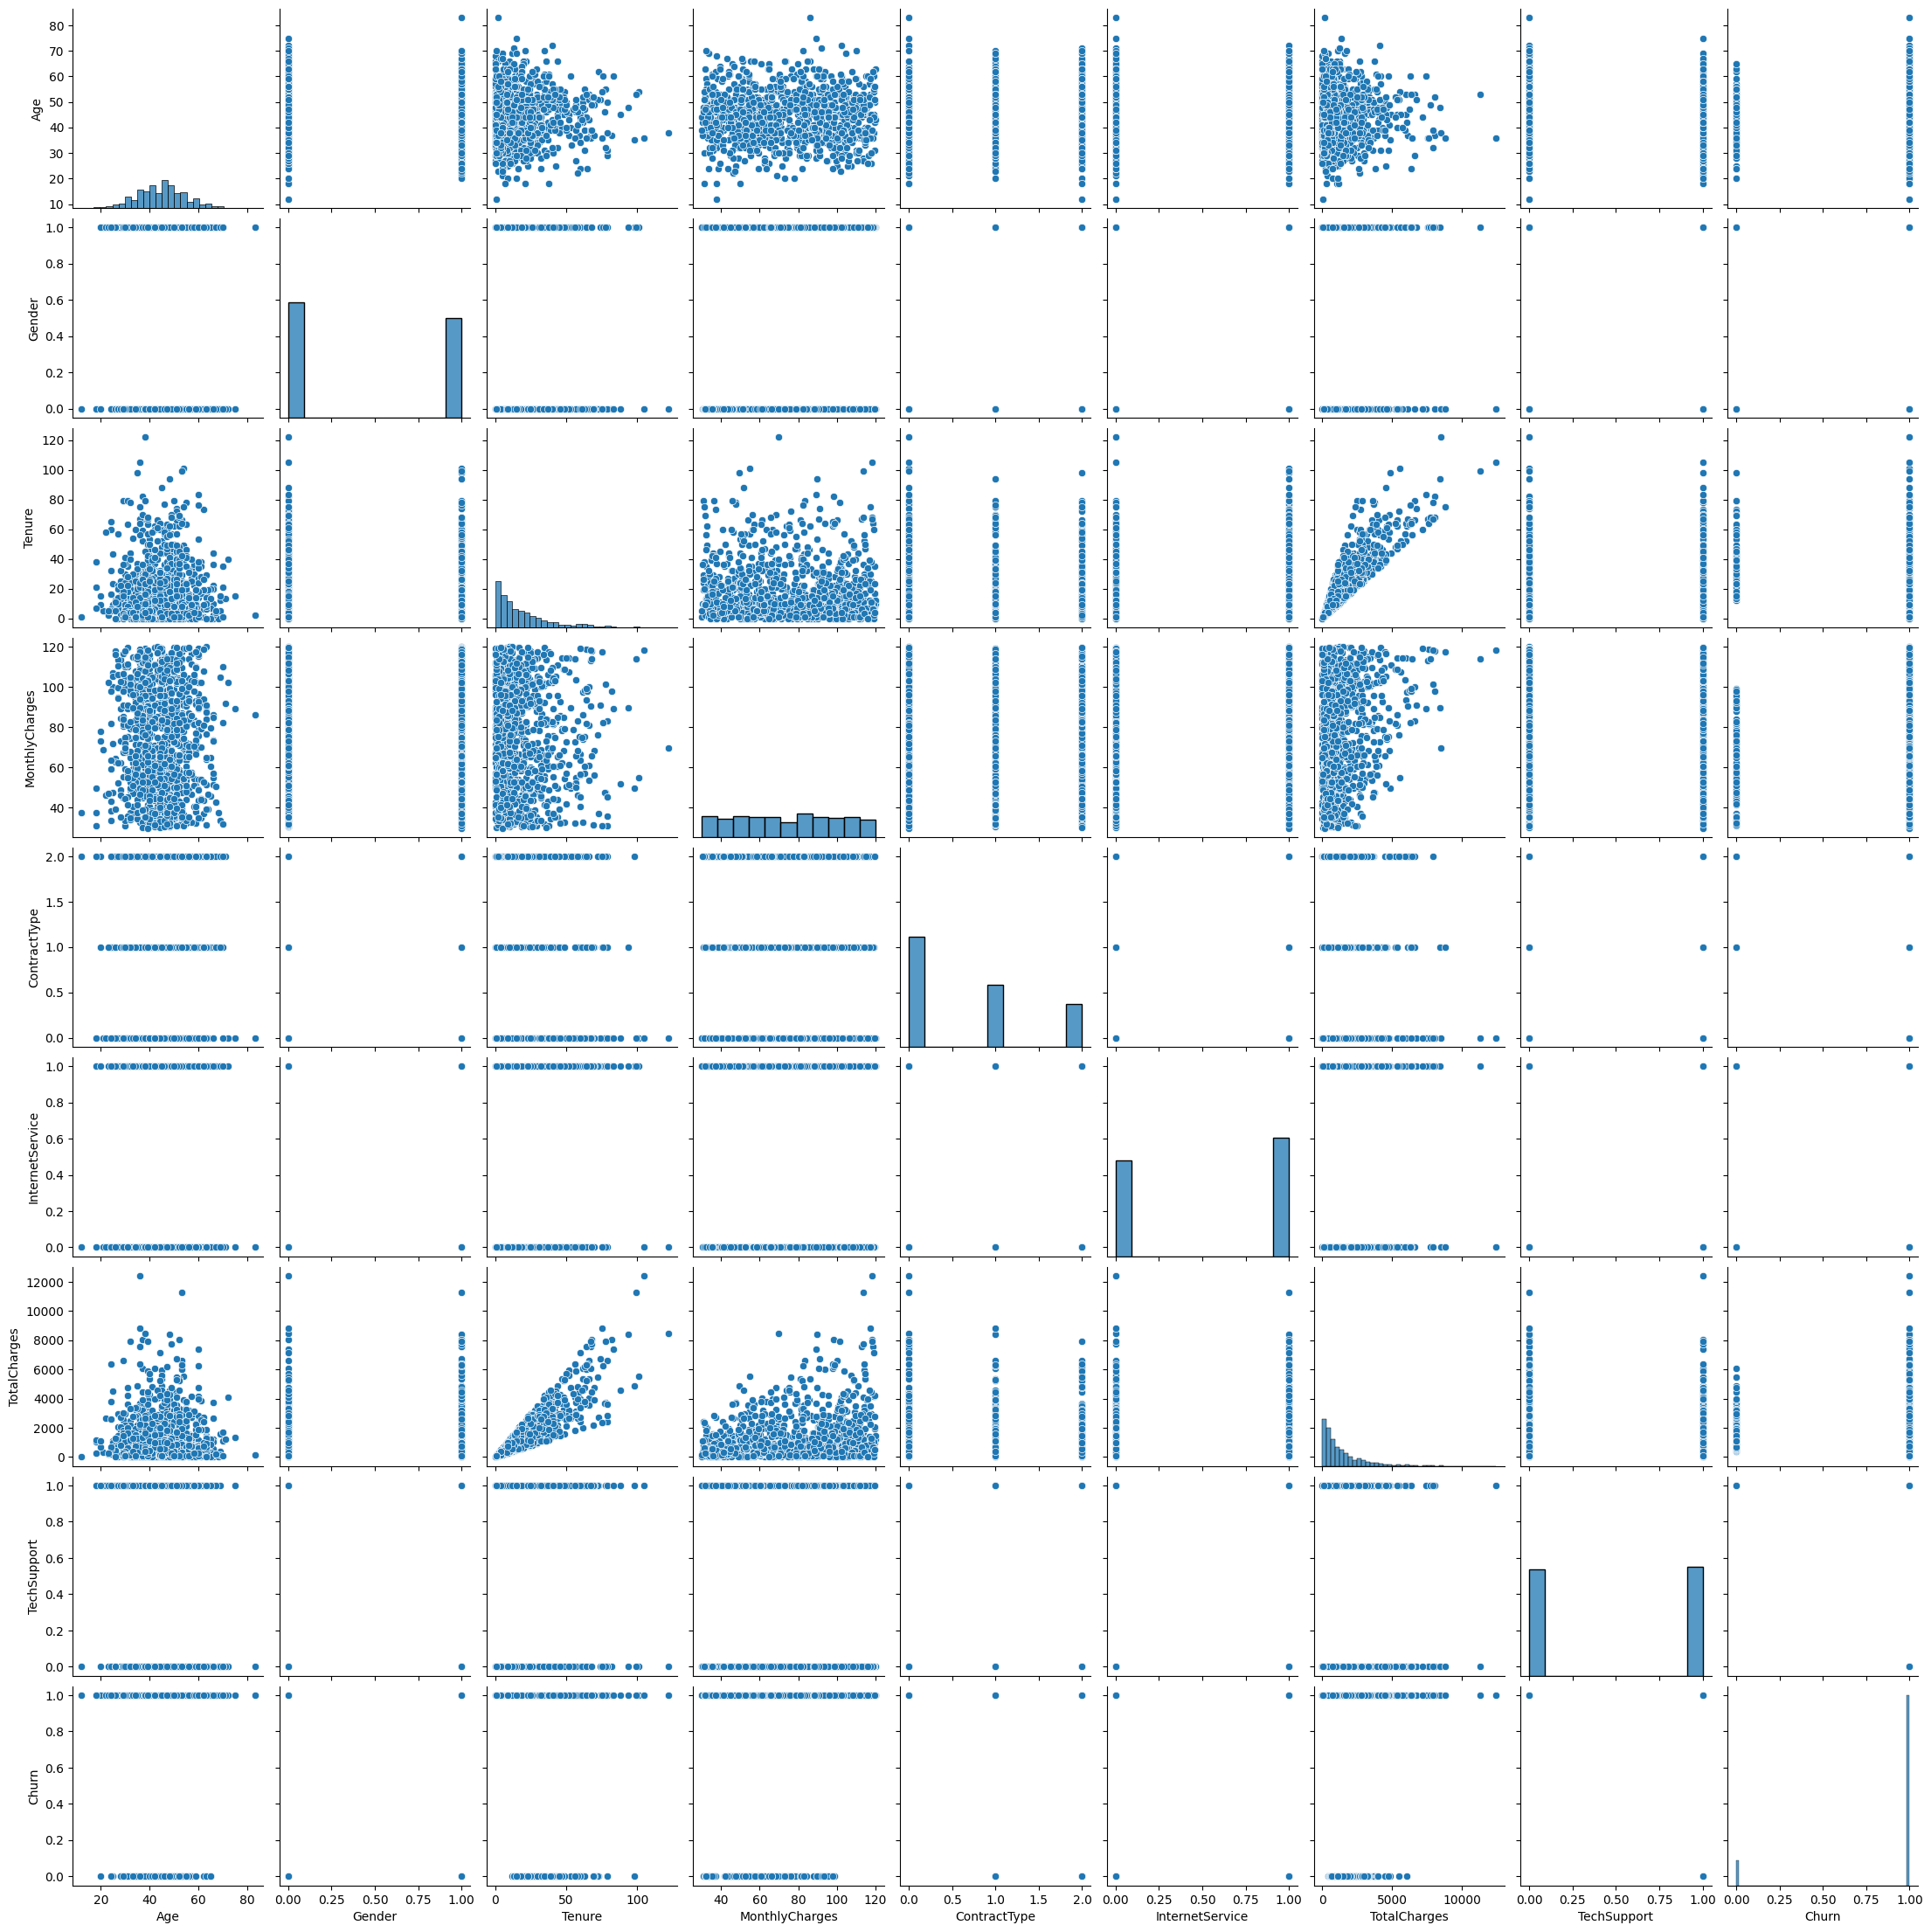

In [55]:
sns.pairplot(df)

In [52]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'ContractType',
       'InternetService', 'TotalCharges', 'TechSupport', 'Churn'],
      dtype='object')